<a href="https://colab.research.google.com/github/jitteryglitter/Covid-SSL/blob/master/Scikit_multiple_regression_ad_spend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

1. Dataset: ad campaign spend across channels, with sales
2. Packages: Scikit Learn
3. Models: Linear Regression, and multiple LR
4. Metrics: R^2, MSE, RMSE

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score, KFold

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
filep = "/content/drive/MyDrive/ML Projects/Data/advertising_and_sales_clean.csv"

df = pd.read_csv(filep)
df.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


# LR for single channel

In [4]:
# Create X, the FEATURES array from the "radio" column
X = df['radio'].values

# Create y, the TARGET array from the "sales" column
y = df['sales'].values

# Reshape X into a 2-D numpy array
X = X.reshape(-1, 1)

# Check the shape of the features and targets
print(X.shape, y.shape)

(4546, 1) (4546,)




> ` 4,564 ` values in both arrays.



In [5]:
# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]




> Sales values for the first five predictions range from USD 95K to 290K



# Visualize fit

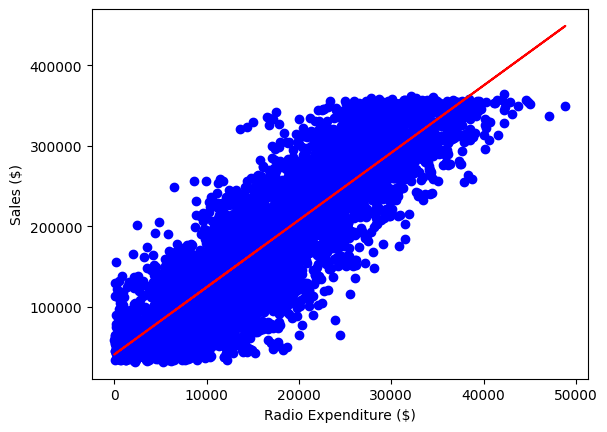

In [6]:
# Create scatter plot
plt.scatter(X, y, color="blue")

# Add line plot on top
plt.plot(X, predictions, color="red")

# Add axes labels
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

> The model nicely captures a near-perfect linear correlation between radio advertising expenditure and sales!

# Multiple LR

In [7]:
# Create X and y arrays
X = df.drop(["influencer", "sales"], axis=1).values
y = df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


> The first two predictions appear to be within around 5% of the actual values from the test set!

# Regression performance

### How well do the features explain the variance in the target values?
1. The default metric for LR = ` R-squared `.
2. It quantifies the amount of variance in the target variable that is explained by the features.
3. Values can range from zero to one, with one meaning the features completely explain the target's variance.

### Assess the model's ability to make predictions on unseen data

1. Another way = ` MSE ` or mean of the residual sum of squares.
2. MSE is measured in units of our target variable, squared.
3. Yet another way = ` RMSE ` or square root of MSE, hence the ` squared=False `.


In [8]:
# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9990152104759368
RMSE: 2944.4331996001006


> Wow, the features explain 99.9% of the variance in sales values! Looks like this company's advertising strategy is working well!

# Cross-validation

If we're computing R-squared on our test set, the R-squared returned is dependent on the way that we split up the data! The data points in the test set may have some peculiarities that mean the R-squared computed on it is not representative of the model's ability to generalize to unseen data. To combat this dependence on what is essentially a random split, we use a technique called cross-validation.

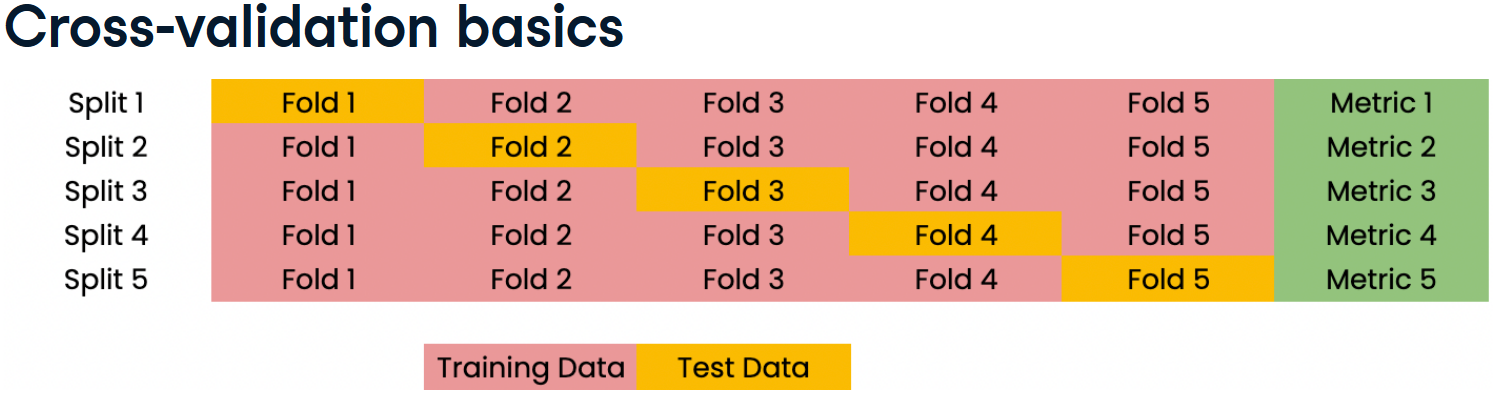

In [ ]:
# Cross-validation is a vital approach to evaluating a model. It maximizes the amount of data that is available to the model, as the model is not only trained but also tested on all of the available data.


In [10]:
# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

# uncomment the line below if you've lost your LR model
# reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_scores)

[0.99894062 0.99909245 0.9990103  0.99896344 0.99889153 0.99903953]


> Notice how R-squared for each fold ranged between 0.74 and 0.77? By using cross-validation, we can see how performance varies depending on how the data is split!

# Analyze CV metrics

In [12]:
# Print the mean
print(np.mean(cv_scores))

# Print the standard deviation
print(np.std(cv_scores))

# Print the 95% confidence interval
print(np.quantile(cv_scores, [0.025, 0.975]))

0.9989896443678249
6.608118371529651e-05
[0.99889767 0.99908583]


> An average score of 0.75 with a low standard deviation is pretty good for a model out of the box

# Regularization

Why regularize?
1. LR minimizes a loss function
2. It chooses a coefficient, a, for each feature variable, plus b
3. Large coefficients can lead to overfitting
4. Regularization: Penalize large coefficients

# Ridge

1. This uses the Ordinary Least Squares loss function plus the squared value of each coefficient, multiplied by a constant, ` alpha `.
2. So, when minimizing the loss function, models are penalized for coefficients with large positive or negative values.
3. When using ` ridge `, we need to choose the ` alpha ` value in order to fit and predict. Essentially, we can select the alpha for which our model performs best.
4. Picking alpha for ridge is similar to picking ` k ` in KNN.
5. Alpha in ridge is known as a hyperparameter, which is a variable used for selecting a model's parameters.
6. Alpha controls model complexity. When ` alpha=0 `, we are performing OLS, where large coefficients are not penalized and overfitting may occur. A high alpha means that large coefficients are significantly penalized, which can lead to underfitting.